In [1]:
import pandas as pd
# Read Dataset
data = pd.read_csv('dataset.csv')

data.head()

,content,date,title,label
0,Berita SurabayaSURYA.co.id | SURABAYA - Pengem...,"Jumat, 10 Juni 2022 01:08",PT Intiland Development Kembangkan Kawasan Ind...,noclickbait
1,Berita SurabayaSURYA.co.id | SURABAYA - Brand ...,"Jumat, 10 Juni 2022 01:16",ANKER Menangkan Penghargaan Nobel Prize di Aja...,noclickbait
2,Berita SurabayaSURYA.co.id | SURABAYA - PT Har...,"Jumat, 10 Juni 2022 01:27","Perluas Bisnis, Hartadinata Abadi Store Buka G...",noclickbait
3,Berita SurabayaSURYA.co.id | SURABAYA – Peneri...,"Jumat, 10 Juni 2022 01:34","PPDB SMP Dibuka Hari Ini, Dindik Surabaya Mint...",clickbait
4,"SURYA.co.id I Masih ingat Ronaldo Nazario, san...","Jumat, 10 Juni 2022 01:51","Liga Spanyol, Ronaldo Legenda Real Madrid, Jad...",clickbait


<AxesSubplot:xlabel='label'>

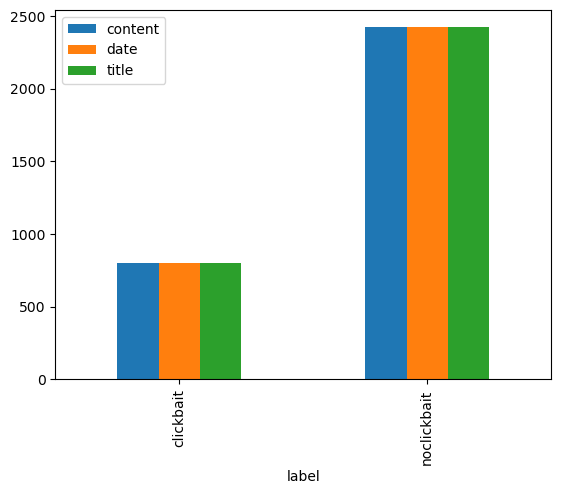

In [2]:
data.groupby('label').count().plot.bar()

In [3]:
data.groupby('label').count()

,content,date,title
label,,,
clickbait,804,804,804
noclickbait,2422,2422,2422


In [4]:
# #balancing data
# data_clickbait = data[data['label']=='clickbait']
# data_clickbait.shape

In [5]:
# data_noclickbait = data[data['label']=='noclickbait']
# data_noclickbait.shape

In [6]:
# data_noclickbait_downsampled = data_noclickbait.sample(data_clickbait.shape[0])
# data_noclickbait_downsampled.shape

In [7]:
# data_balanced = pd.concat([data_noclickbait_downsampled, data_clickbait])
# data_balanced.shape

In [8]:
# data_balanced.groupby('label').count()

In [9]:
data['Combined'] = data['title'] + ' ' + data['content']
data.head

<bound method NDFrame.head of                                                 content  \
0     Berita SurabayaSURYA.co.id | SURABAYA - Pengem...   
1     Berita SurabayaSURYA.co.id | SURABAYA - Brand ...   
2     Berita SurabayaSURYA.co.id | SURABAYA - PT Har...   
3     Berita SurabayaSURYA.co.id | SURABAYA – Peneri...   
4     SURYA.co.id I Masih ingat Ronaldo Nazario, san...   
...                                                 ...   
3221  Berita SurabayaSURYA.co.id | SURABAYA - Mahasi...   
3222  Berita SurabayaSURYA.co.id | SURABAYA - Pengem...   
3223  SURYA.co.id I Kerja shift malam, sudah tentu m...   
3224  Berita MadiunSURYA.vo.id, MADIUN - Piala Dunia...   
3225  Berita MadiunSURYA.co.id, MADIUN - Bola Al Rih...   

                           date  \
0     Jumat, 10 Juni 2022 01:08   
1     Jumat, 10 Juni 2022 01:16   
2     Jumat, 10 Juni 2022 01:27   
3     Jumat, 10 Juni 2022 01:34   
4     Jumat, 10 Juni 2022 01:51   
...                         ...   
3221  Senin, 20 

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, LSTM, Embedding, Flatten
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [11]:
label = LabelEncoder().fit_transform(data["label"])
label

array([1, 1, 1, ..., 1, 1, 1])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data['Combined'], label, test_size=0.2, random_state=42)
input_length=100

In [13]:
tok = Tokenizer(oov_token='UNK', num_words=1000)
tok.fit_on_texts(x_train)

In [14]:
tok.word_index

{'UNK': 1,
 'yang': 2,
 'di': 3,
 'dan': 4,
 'ini': 5,
 'untuk': 6,
 'dari': 7,
 'dengan': 8,
 'itu': 9,
 '2022': 10,
 'juga': 11,
 'dalam': 12,
 'ke': 13,
 'tidak': 14,
 'pada': 15,
 'akan': 16,
 'ada': 17,
 'id': 18,
 'co': 19,
 'bisa': 20,
 'tersebut': 21,
 'surya': 22,
 'saat': 23,
 'surabaya': 24,
 'sudah': 25,
 'kami': 26,
 'menjadi': 27,
 '1': 28,
 'karena': 29,
 'tahun': 30,
 'oleh': 31,
 '10': 32,
 'masyarakat': 33,
 'atau': 34,
 'hari': 35,
 'kepada': 36,
 'sebagai': 37,
 'indonesia': 38,
 'masih': 39,
 'kata': 40,
 'kota': 41,
 'satu': 42,
 'lebih': 43,
 'persebaya': 44,
 'para': 45,
 'pemain': 46,
 'hingga': 47,
 'warga': 48,
 'telah': 49,
 'dua': 50,
 '2': 51,
 'orang': 52,
 'saya': 53,
 'adalah': 54,
 'desa': 55,
 'rumah': 56,
 'kabupaten': 57,
 '20': 58,
 'tim': 59,
 'harus': 60,
 'anak': 61,
 'seperti': 62,
 'melakukan': 63,
 'baca': 64,
 'setelah': 65,
 'hanya': 66,
 'mereka': 67,
 '3': 68,
 'baru': 69,
 'tak': 70,
 'korban': 71,
 '”': 72,
 'dapat': 73,
 '19': 74,
 'di

In [15]:
x_train_seq = tok.texts_to_sequences(x_train)
x_test_seq = tok.texts_to_sequences(x_test)

In [16]:
x_train

1480    Hasil Monaco vs PSG: Tanpa Lionel Messi, Mbapp...
2592    Akhir Tahun 2022, Diprediksi 1,19 Juta Orang L...
366     BPCB Jatim Temukan Struktur Diduga Saluran Air...
1967    KEINGINAN TERBESAR Sule di Hari Sidang Percera...
29      7 Fakta Penemuan Eril di Bendungan Engehalde, ...
                              ...                        
1095    Polres Lamongan Gelar Patroli Skala Besar, Sas...
1130    Kemenag Jatim Prioritaskan Usia 65 Tahun ke Ba...
1294    Hasil Klasemen Piala AFF U-2022 Usai Timnas In...
860     Benda Keramat Atta Halilintar Dilelang, Saksi ...
3174    Tebing Longsor Putuskan Jalur ke Wisata Gunung...
Name: Combined, Length: 2580, dtype: object

In [17]:
x_train_seq[0]

[89,
 1,
 124,
 1,
 307,
 1,
 1,
 1,
 1,
 1,
 68,
 257,
 307,
 1,
 22,
 19,
 18,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 68,
 257,
 307,
 1,
 1,
 1,
 1,
 611,
 177,
 58,
 68,
 10,
 1,
 148,
 202,
 89,
 1,
 1,
 5,
 59,
 1,
 1,
 1,
 9,
 1,
 31,
 1,
 1,
 8,
 258,
 68,
 257,
 307,
 1,
 1,
 166,
 2,
 1,
 719,
 2,
 1,
 1,
 1,
 1,
 31,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 496,
 307,
 1,
 70,
 296,
 849,
 42,
 166,
 1,
 1,
 1,
 11,
 1,
 70,
 1,
 335,
 1,
 1,
 288,
 1,
 68,
 257,
 9,
 1,
 785,
 1,
 3,
 716,
 1,
 1,
 15,
 299,
 13,
 1,
 1,
 28,
 1,
 1,
 785,
 1,
 1,
 39,
 1,
 3,
 260,
 815,
 373,
 8,
 421,
 1,
 1,
 245,
 9,
 39,
 43,
 77,
 329,
 245,
 7,
 260,
 151,
 2,
 1,
 31,
 1,
 1,
 1,
 22,
 19,
 18,
 7,
 1,
 422,
 1,
 1,
 1,
 417,
 921,
 8,
 1,
 418,
 183,
 297,
 273,
 120,
 83,
 1,
 1,
 464,
 151,
 59,
 207,
 1,
 84,
 1,
 1,
 43,
 77,
 1,
 465,
 1,
 1,
 1,
 186,
 1,
 1,
 1,
 13,
 642,
 719,
 8,
 886,
 3,
 436,
 807,
 1,
 97,
 42,
 1,
 1,
 1,
 1,
 11,
 1,
 166,
 15,
 195,
 13,
 443]

In [18]:
x_train_pad = pad_sequences(x_train_seq, maxlen=input_length, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=input_length, padding='post')

In [19]:
x_train_pad[0]

array([  1,  15, 299,  13,   1,   1,  28,   1,   1, 785,   1,   1,  39,
         1,   3, 260, 815, 373,   8, 421,   1,   1, 245,   9,  39,  43,
        77, 329, 245,   7, 260, 151,   2,   1,  31,   1,   1,   1,  22,
        19,  18,   7,   1, 422,   1,   1,   1, 417, 921,   8,   1, 418,
       183, 297, 273, 120,  83,   1,   1, 464, 151,  59, 207,   1,  84,
         1,   1,  43,  77,   1, 465,   1,   1,   1, 186,   1,   1,   1,
        13, 642, 719,   8, 886,   3, 436, 807,   1,  97,  42,   1,   1,
         1,   1,  11,   1, 166,  15, 195,  13, 443])

In [31]:
model = Sequential([
                    Embedding(1000, 50, input_length=input_length),
                    LSTM(200, activation='sigmoid', return_sequences=True),
                    Dropout(0.5),
                    LSTM(64, activation='sigmoid'),
                    Dense(16, activation='sigmoid'),
                    Dense(1, activation='sigmoid')
])

In [32]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           50000     
                                                                 
 lstm_4 (LSTM)               (None, 100, 200)          200800    
                                                                 
 dropout_3 (Dropout)         (None, 100, 200)          0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                67840     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 319,697
Trainable params: 319,697
Non-tr

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
print('Fitting model...')
hist = model.fit(x_train_pad,y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Fitting model...
Epoch 1/10
33/33 [==============================] - 20s 468ms/step - loss: 0.5836 - accuracy: 0.7180 - val_loss: 0.5624 - val_accuracy: 0.7519
Epoch 2/10
33/33 [==============================] - 15s 446ms/step - loss: 0.5579 - accuracy: 0.7544 - val_loss: 0.5602 - val_accuracy: 0.7519
Epoch 3/10
33/33 [==============================] - 14s 433ms/step - loss: 0.5587 - accuracy: 0.7544 - val_loss: 0.5611 - val_accuracy: 0.7519
Epoch 4/10
33/33 [==============================] - 14s 434ms/step - loss: 0.5579 - accuracy: 0.7544 - val_loss: 0.5602 - val_accuracy: 0.7519
Epoch 5/10
33/33 [==============================] - 14s 432ms/step - loss: 0.5584 - accuracy: 0.7544 - val_loss: 0.5601 - val_accuracy: 0.7519
Epoch 6/10
33/33 [==============================] - 14s 434ms/step - loss: 0.5580 - accuracy: 0.7544 - val_loss: 0.5600 - val_accuracy: 0.7519
Epoch 7/10
33/33 [==============================] - 15s 445ms/step - loss: 0.5569 - accuracy: 0.7544 - val_loss: 0.5593 - val

In [35]:
model.evaluate(x_test_pad, y_test)

21/21 [==============================] - 2s 92ms/step - loss: 0.5656 - accuracy: 0.7384


[0.5655901432037354, 0.7383900880813599]

In [38]:
input_judul = ['PPDB SMP Dibuka Hari Ini, Dindik Surabaya Minta Wali Murid Tak Percayai Oknum Jual-Beli Bangku',]
input_isi = ['Berita SurabayaSURYA.co.id | SURABAYA – Penerimaan Peserta Didik Baru (PPDB) SMP tahun 2022/2023 di Kota Surabaya mulai dibuka, Jumat (10/6/2022).Ada dua jalur yang dibuka untuk tahap awal tersebut, yakni afirmasi inklusi dan afirmasi mitra warga.Bagi lulusan sekolah inklusi di Surabaya, Dindik Surabaya akan menempatkan langsung berdasarkan data tempat domisili sesuai kartu keluarga (KK).Sedangkan mira warga diperuntukkan bagi Masyarakat Berpenghasilan Rendah (MBR).Setelah pendaftaran dibuka 6 hari (10-15/6/2022), selanjutnya siswa terpilih akan diumumkan pada 16 Juni.”Pola daftarnya masih sama seperti SD. Untuk kategori mitra warga, CPDB dari luar MBR tidak bisa diterima," kata Kepala Dindik Surabaya Yusuf Masruh.Selain dua jalur tersebut, Dindik juga akan membuka PPDB jalur perpindahan tugas orang tua, 14-15 Juni 2022 mendatang.Kemudian, pendaftaran jalur prestasi nilai rapor dan prestasi perlombaan, 16-20 Juni 2022.Masing-masing jalur memiliki kuota berbeda. Jalur perpindahan orang, misalnya adalah paling banyak 5 persen.Kemudian, afirmasi kategori inklusi dan MBR paling sedikit 15 persen, diikuti jalur prestasi paling banyak 30 persen, dan jalur zonasi paling sedikit ada 50 persen.Surabaya memiliki 63 sekolah SMP Negeri.Total, ada 590 rombongan belajar (rombel) dengan maksimal 32 siswa per rombel.Pihaknya memastikan, seluruh proses transparan sebab diakses melalui system website ppdbsurabaya.net yang dikelola Dinas Pendidikan.']
input_judul2 = ['Ribuan Bonek Serbu Bandung Dukung Persebaya di Piala Presiden 2022, Cak Cong: Jaga Keamanan Rek!']
input_isi2 = [' SURYA.co.id | SURABAYA - Gelombang ribuan Bonek akan serbu Kota Bandung untuk memberikan dukungan secara langsung kepada Persebaya Surabaya tampil di Piala Presiden 2022.Husain Ghozali, koordinator Green Nord 27 (salah satu kelompok tribun suporter) kepada surya.co.id menyebutkan, diputuskannya Bonek berangkat ke Kota Bandung karena Ibu Kota Provinsi Jabar menjadi rumah kedua bagi Bonek dan Persebaya.Selain kedekatan antara suporter Persebaya Surabaya dan Persib Bandung. Bandung memiliki banyak kenangan bagi Bajul IjoDiantaranya, Persebaya Surabaya diakui kembali oleh PSSI (setelah sebelumnya dibekukan) dalam Kongres PSSI yang dilakukan di Bandung.Persebaya Surabaya menjadi juara Liga 2 2017 dalam laga final yang digelar di Bandung."Pasti banyak (Bonek ke Bandung), bagi Bonek, Bandung kan rumah kedua. Banyak hubungan antar suporter, Surabaya-Bandung sangat bagus sehingga mereka merasa nyaman di Bandung," sebut Husain Ghozali pada surya.co.id, Kamis (9/6/2022).Gelombang ribuan Bonek ke Bandung itu terjadi secara mandiri karena kelompok suporter Bonek tidak memberangkatkan anggotanya secara resmi."Kami secara resmi tidak memberangkatkan away Bandung. Tapi temen-temen berinisiatif away Bandung secara mandiri," jelas pria akrab disapa Cak Cong itu."Jadi saya harap kenyamanan ini agar dijaga, jangan sampai temen-temen dari Surabaya membuat tuan rumah tidak nyaman. Tetap menjaga seduluran," ucap Cak Cong.Jadwal babak penyisihan Grup C Piala Presiden 2022 pada laga pertama, Persebaya Surabaya akan menghadapi Bhayangkara FC pada 13 Juni 2022 mendatang, kick off pukul 20.30 Wib.Selanjutnya laga kedua akan meladeni Persib Bandung di tempat yang sama, Jumat (17/6/2022), kick off pukul 20.30 Wib.Laga penutup Grup C, Persebaya akan hadapi Bali United, Senin (20/6/2022) di tempat dan waktu yang sama. ']

input_prediksi = input_judul + input_isi
input_prediksi2 = input_judul2 + input_isi2

input_seq = tok.texts_to_sequences(input_prediksi)
input_seq2 = tok.texts_to_sequences(input_prediksi2)

input_pad = pad_sequences(input_seq, maxlen=input_length, padding='post')
input_pad2 = pad_sequences(input_seq2, maxlen=input_length, padding='post')

In [40]:
model.predict(input_pad2)

1/1 [==============================] - 0s 62ms/step


array([[0.82919484],
       [0.7165872 ]], dtype=float32)

In [ ]:
from tkinter import *
import tkinter.messagebox
from sklearn.svm import LinearSVC


root = Tk()
root.title("DETEKSI JUDUL BERITA")
root.geometry("400x200")

Label(root,
   text="Masukkan Judul Berita!",
   font = "Arial 12 bold ").pack()

komen=Entry(root, width=50, borderwidth=5)
komen.pack()
komen.insert(0," ")

    
def myClick():
    global myLabel
    kom=[]
    kom.append(komen.get())
    df_clean = pd.read_csv('dataset.csv', encoding='latin1')
    X_train = list(df_clean['title'])
    Y_train = list(df_clean['label'])
    
    pipeline=Pipeline([
        ('bow',CountVectorizer()),  
        ('tfidf', TfidfTransformer()), 
        ('classifier', LinearSVC()), 
    ])
    pipeline.fit(X_train,Y_train)
    predictions = pipeline.predict(kom)
    hasil_p= "".join(predictions)
    print(hasil_p)
      #  def myLabel(hasil_p):
    if(hasil_p=="noclickbait"):
        Label(root, text="Judul: "+komen.get()).pack()
        Label(root, text = "Judul " + hasil_p, fg="black", font="Arial 10 bold").pack()
        Label(root, text="Judul tersebut tidak clickbait", fg="blue" , font= "Arial 12 bold").pack()
    else:
        Label(root, text="Judul: "+komen.get()).pack()
        Label(root, text ="Judul "+ hasil_p, fg="red", font="Arial 12 bold").pack()
        tkinter.messagebox.showinfo("Judul Clickbait !!!", "Judul yang dimasukkan Clickbait")

def myDelete():
    Label.destroy(0,root.END)
    return Label

button1 = Button(root, text="Submit", padx=50, command=myClick)
button1.pack()

button2 = Button(root, text="Keluar", padx=10, command=root.destroy)
button2.pack()

button3 = Button(root, text="Hapus", padx=10,command=myDelete)
button3.pack()


button2.place(x=320, y=160)
button3.place(x=10, y=160)

root.mainloop()